<a href="https://colab.research.google.com/github/eeolga/article/blob/main/3D_KLO2024_data_corelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn as nn

In [ ]:
import pandas as pd

In [ ]:
CAD_path="/content/CAD_KLO_07082024.xlsx"

CAD_logs file data

In [ ]:
data = pd.read_excel("/content/CAD_KLO_07082024.xlsx")

In [ ]:
display(pd.DataFrame(data))

,timestamp,user_id,tool_id,competency,activity_id,date,time,lesson
0,"17/05/24, 13:10:11",29455,3299,1,20706,2024-05-17,13:10:11,1
1,"17/05/24, 13:10:11",29455,233156,1,20807,2024-05-17,13:10:11,1
2,"17/05/24, 13:09:51",29455,3299,1,20706,2024-05-17,13:09:51,1
3,"17/05/24, 13:09:49",29455,233156,1,20807,2024-05-17,13:09:49,1
4,"17/05/24, 13:02:38",29455,3299,1,20706,2024-05-17,13:02:38,1
...,...,...,...,...,...,...,...,...
5650,"9/02/24, 19:54:20",29455,2949,0,10103,2024-02-09,19:54:20,0
5651,"9/02/24, 19:53:27",29455,2949,0,10103,2024-02-09,19:53:27,0
5652,"9/02/24, 19:53:27",29455,2949,0,10102,2024-02-09,19:53:27,0
5653,"9/02/24, 19:53:27",29455,2949,0,10102,2024-02-09,19:53:27,0


Feature Engineering

In [ ]:
df = pd.read_excel("/content/CAD_KLO_07082024.xlsx")
test_df = pd.read_excel("/content/CAD_KLO_07082024.xlsx")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5655 entries, 0 to 5654
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    5655 non-null   object        
 1   user_id      5655 non-null   int64         
 2   tool_id      5655 non-null   int64         
 3   competency   5655 non-null   int64         
 4   activity_id  5655 non-null   int64         
 5   date         5655 non-null   datetime64[ns]
 6   time         5655 non-null   object        
 7   lesson       5655 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 353.6+ KB


In [ ]:
def feature_engineering(df): #feature engineering function

    return df

In [ ]:
df = feature_engineering(df)

In [ ]:
df = df.drop(['timestamp', 'date', 'time'], axis=1) # Remove columns I no longer need

In [ ]:
df.isna().sum()  # Data Cleaning

,0
user_id,0
tool_id,0
competency,0
activity_id,0
lesson,0


In [ ]:
def scale_min_max(df, col_name, xmin, xmax):  # Normalization
    df[col_name] = (df[col_name] - xmin) / (xmax - xmin)
    return df

train_age_min = df['competency'].min()
train_age_max = df['competency'].max()
df = scale_min_max(df, 'competency', train_age_min, train_age_max)

df['competency'].describe()

,competency
count,5655.000000
mean,0.576746
std,0.382928
min,0.000000
25%,0.250000
50%,0.750000
75%,1.000000
max,1.000000


Data correlation

In [ ]:
def divide_df(all_data):
    # Returns divided dfs of training and test set
    return all_data.loc[:16], all_data.loc[16:].drop(['timestamp', 'date', 'time'], axis=1)

df_train = pd.read_excel("/content/CAD_KLO_07082024.xlsx")
df_test = pd.read_excel("/content/CAD_KLO_07082024.xlsx")


df_train.name = 'Training Set'
df_test.name = 'Test Set'


dfs = [df_train, df_test]

print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train['user_id'].shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))
print(df_train.columns)
print(df_test.columns)

Number of Training Examples = 5655
Number of Test Examples = 5655

Training X Shape = (5655, 8)
Training y Shape = 5655

Test X Shape = (5655, 8)
Test y Shape = 5655

Index(['timestamp', 'user_id', 'tool_id', 'competency', 'activity_id', 'date',
       'time', 'lesson'],
      dtype='object')
Index(['timestamp', 'user_id', 'tool_id', 'competency', 'activity_id', 'date',
       'time', 'lesson'],
      dtype='object')


In [ ]:
# Ensure 'timestamp' column is dropped from both training and test datasets
df_train_cleaned = df_train.drop(['timestamp', 'date', 'time'], axis=1)
df_test_cleaned = df_test.drop(['timestamp', 'date', 'time'], axis=1)

In [ ]:
# Verify all columns in df_train_cleaned and df_test_cleaned are numeric
numeric_columns_train = df_train_cleaned.select_dtypes(include=[int, float]).columns
numeric_columns_test = df_test_cleaned.select_dtypes(include=[int, float]).columns

In [ ]:
# Compute correlations only on numeric columns
df_train_corr = df_train_cleaned[numeric_columns_train].corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_train_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_train_corr.drop(df_train_corr.iloc[1::2].index, inplace=True)
df_train_corr_nd = df_train_corr.drop(df_train_corr[df_train_corr['Correlation Coefficient'] == 1.0].index)


In [ ]:
df_test_corr = df_test_cleaned[numeric_columns_test].corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_test_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_test_corr.drop(df_test_corr.iloc[1::2].index, inplace=True)
df_test_corr_nd = df_test_corr.drop(df_test_corr[df_test_corr['Correlation Coefficient'] == 1.0].index)

Index(['timestamp', 'user_id', 'tool_id', 'competency', 'activity_id', 'date',
       'time', 'lesson'],
      dtype='object')
Index(['timestamp', 'user_id', 'tool_id', 'competency', 'activity_id', 'date',
       'time', 'lesson'],
      dtype='object')


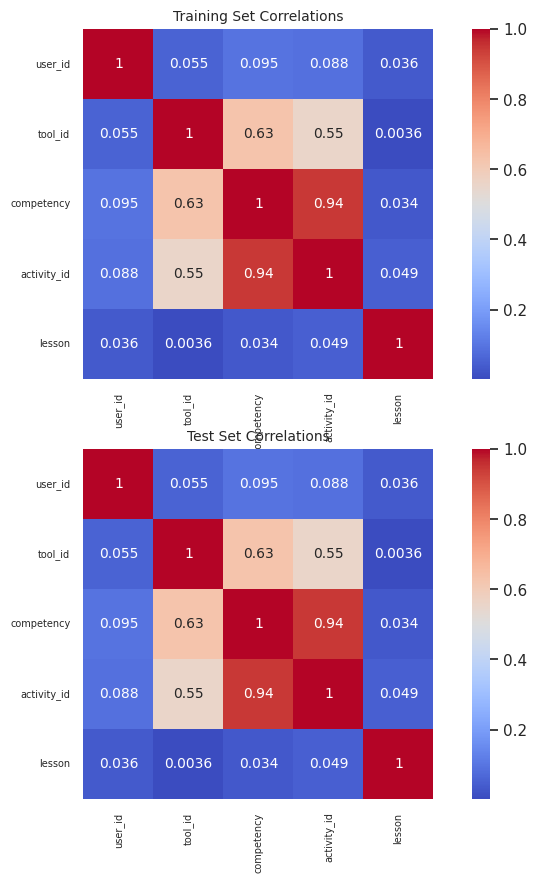

In [ ]:
!pip install seaborn
import seaborn as sns

# Verify 'timestamp' column is actually dropped
print(df_train.columns)
print(df_test.columns)

# Drop 'timestamp' again if still present, and reassign to new variables for clarity
df_train_dropped = df_train.drop(['timestamp', 'date', 'time'], axis=1)
df_test_dropped = df_test.drop(['timestamp', 'date', 'time'], axis=1)

fig, axs = plt.subplots(nrows=2, figsize=(10, 10))

# Use the new DataFrames with 'timestamp' dropped
sns.heatmap(df_train_dropped.corr(), ax=axs[0], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 10})
sns.heatmap(df_test_dropped.corr(), ax=axs[1], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 10})

for i in range(2):
    axs[i].tick_params(axis='x', labelsize=7)
    axs[i].tick_params(axis='y', labelsize=7)

axs[0].set_title('Training Set Correlations', size=10)
axs[1].set_title('Test Set Correlations', size=10)

plt.show()

Very high correlation is activity_id and competency 0.94,

competency and tool_id 0.63

and activity_id and tool_id 0.55.